# ONE VARIABLE IN ONE MODEL -  Lineal Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np

In [3]:
dfcars = pd.read_csv("..\\data\\auto\\auto-mpg.csv")

In [4]:
dfcars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
dfcars.dropna(axis=0,inplace=True)
dfcars=dfcars[dfcars['horsepower']!='?']
dfcars['horsepower']=dfcars['horsepower'].astype('float')
dfcars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


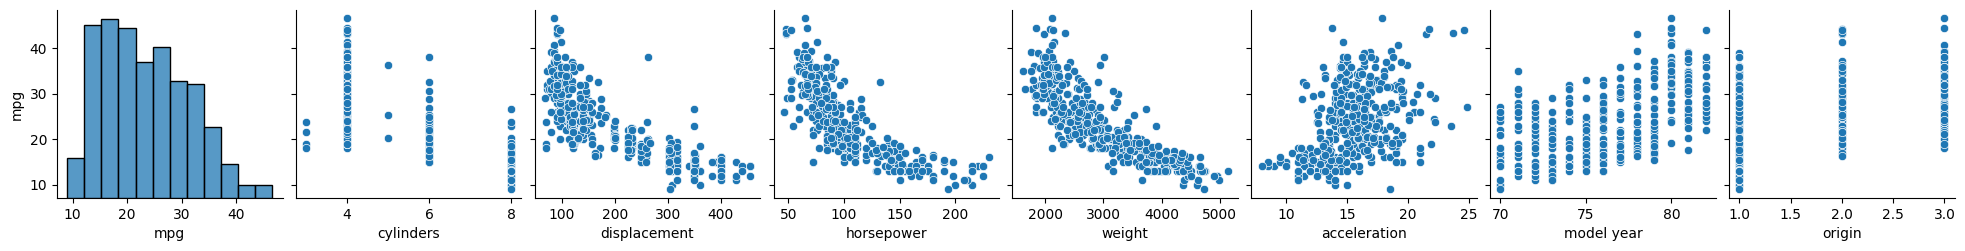

In [6]:
sns.pairplot(dfcars,y_vars='mpg')

<Axes: >

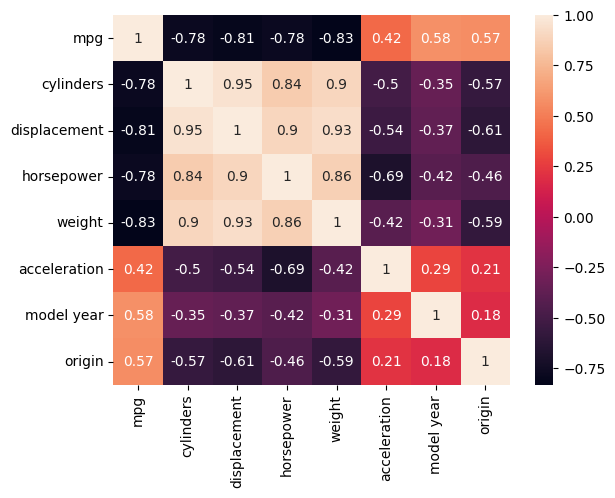

In [11]:
dfcars_numbers = dfcars[['mpg',	'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
sns.heatmap(dfcars_numbers.corr(),annot=True)

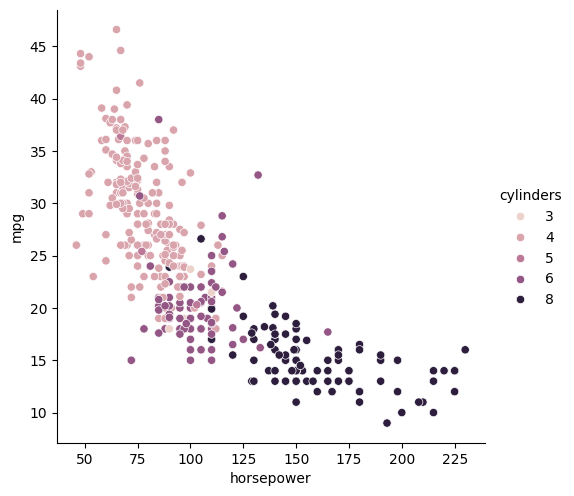

In [7]:
sns.pairplot(data=dfcars,y_vars='mpg',x_vars='horsepower',hue='cylinders',size=5)

In [12]:
x = dfcars.horsepower
y = dfcars.mpg  

In [14]:
import statsmodels.api as sm

X = sm.add_constant(x)
X

,const,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0
4,1.0,140.0
...,...,...
393,1.0,86.0
394,1.0,52.0
395,1.0,84.0
396,1.0,79.0


In [21]:
#Minimos Cuadrados - OLS ->  Ordinary least square
regr = sm.OLS(y, X)

results = regr.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           7.03e-81
Time:                        22:50:56   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
beta0 = results.params[0]
beta1 = results.params[1]

In [23]:
from statsmodels.tools import eval_measures

y_pred=results.predict(X)
rmse=eval_measures.rmse(y,y_pred)
print("Error cuadratico medio(hp): ", rmse)

Error cuadratico medio(hp):  4.893226230065713


1

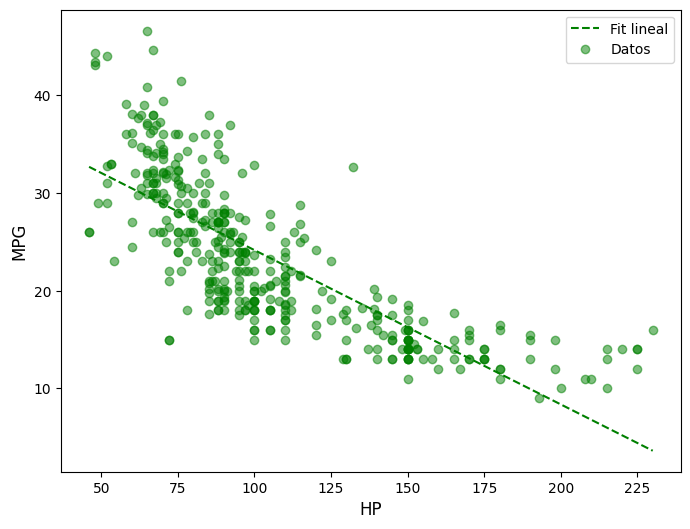

In [24]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

#definir el vector x a graficar
grid = np.linspace(np.min(dfcars.horsepower), np.max(dfcars.horsepower), 100)

#predicciones para el vector x
y_fit=beta0+beta1*grid
#y_fit=results.predict(sm.add_constant(grid))

ax.plot(grid,y_fit, '--',color='g',label='Fit lineal')

ax.plot(dfcars.horsepower,dfcars.mpg, 'o',color='g',alpha=0.5,label='Datos')

ax.set_xlabel("HP", fontsize=12)
ax.set_ylabel("MPG", fontsize=12)
ax.legend()

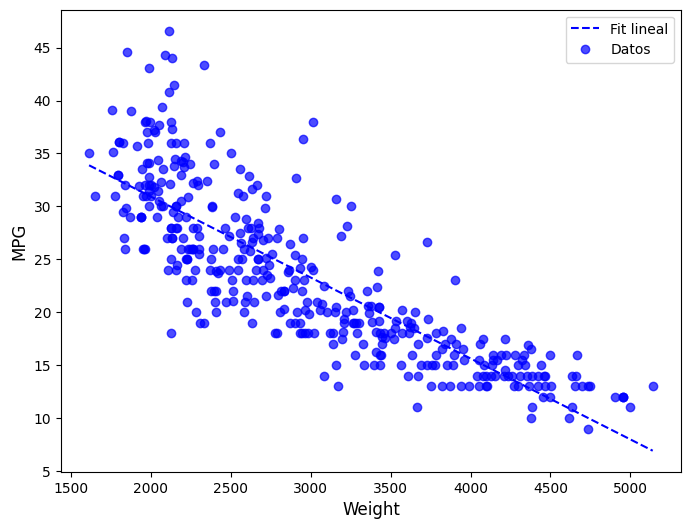

In [26]:
x2 = dfcars.weight
y = dfcars.mpg

X2 = sm.add_constant(x2)

regr2 = sm.OLS(y, X2)
res2 = regr2.fit()


fig, ax = plt.subplots(1,1, figsize=(8,6))
grid2 = np.linspace(np.min(dfcars.weight), np.max(dfcars.weight), 100)

y_fit_lineal=res2.predict(sm.add_constant(grid2))

ax.plot(grid2,y_fit_lineal, '--',color='b',label='Fit lineal')

ax.plot(dfcars.weight,dfcars.mpg, 'o',color='b',alpha=0.7,label='Datos')

ax.set_xlabel("Weight", fontsize=12)
ax.set_ylabel("MPG", fontsize=12)
ax.legend()

In [27]:
res2.rsquared

0.6926304331206254

In [28]:
from statsmodels.tools import eval_measures

y_pred2 = res2.predict(X2)
rmse2= eval_measures.rmse(y,y_pred2)
print('Error cuadratico medio (weight): ', rmse2)

Error cuadratico medio (weight):  4.321645126270701


In [29]:
print('Error cuadratico medio (hp):', rmse)

Error cuadratico medio (hp): 4.893226230065713
